# Library

In [ ]:
import sys
sys.path.append('../../Util')
import PreProcessingUtils as ppu
import PreProcessingText as ppt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import networkx as nx
from collections import Counter, defaultdict
import squarify

# Read Data

In [3]:
PATH = "../../Datasets/"

In [68]:
df = pd.read_csv(f"{PATH}RawData/threads_raid_forums.csv")
df

C:\Users\dommy\AppData\Local\Temp\ipykernel_8612\2928019086.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{PATH}RawData/threads_raid_forums.csv")


,id,site_id,board_id,creator,creator_id,label,name,url,created_on,last_post_on,db_created_on,db_updated_on
0,154984,1036,216,NaN,NaN,BUYING,TWITCH DATABASE,https://raidforums.com/Thread-BUYING-TWITCH-DA...,2021-12-16 15:56:45,2021-10-06 19:50:00,2021-12-16 15:56:45.910681,2021-12-16 15:56:45.910681
1,135113,1036,216,NaN,NaN,SELLING,Databases for trade/sale,https://raidforums.com/Thread-SELLING-Database...,2021-12-16 16:18:26,2021-06-09 03:56:00,2021-12-16 16:18:26.87658,2021-12-16 16:18:26.87658
2,139628,1036,216,NaN,NaN,SELLING,Vehicle Owners Data,https://raidforums.com/Thread-SELLING-Vehicle-...,2021-12-16 16:18:41,2021-06-05 18:37:00,2021-12-16 16:18:41.801145,2021-12-16 16:18:41.801145
3,140939,1036,216,NaN,NaN,SELLING,DATABASES ALL CHILEANS,https://raidforums.com/Thread-SELLING-DATABASE...,2021-12-16 16:17:17,2021-06-19 07:21:00,2021-12-16 16:17:17.4407,2021-12-16 16:17:17.4407
4,155030,1036,216,NaN,NaN,BUYING,Bulgarian ABV.BG - Combolists!,https://raidforums.com/Thread-BUYING-Bulgarian...,2021-12-16 15:56:31,2021-10-07 08:24:00,2021-12-16 15:56:31.254002,2021-12-16 15:56:31.254002
...,...,...,...,...,...,...,...,...,...,...,...,...
114445,2043,1036,32,Moot,1188.0,NaN,Team Spic,https://raidforums.com/Thread-Team-Spic,2018-08-28 22:01:05.114755,NaN,2022-04-23 07:37:32.785559,2022-04-23 07:37:32.785559
114446,45238,1036,158,BMT,121426088.0,NaN,Intel’s 9th generation processors rumored to l...,https://raidforums.com/Thread-Intel%E2%80%99s-...,2018-09-07 17:49:36.22374,NaN,2022-04-23 07:39:25.220328,2022-04-23 07:39:25.220328
114447,45241,1036,158,BMT,121426088.0,NaN,Russian Hackers Have Invaded Hundreds of US Ut...,https://raidforums.com/Thread-Russian-Hackers-...,2018-09-07 17:50:22.44083,NaN,2022-04-23 07:39:25.236637,2022-04-23 07:39:25.236637
114448,16942,1036,166,walkerme09,121352677.0,NaN,NO CREDS NEEDED (+18) Nicky Minaj and Jennifer...,https://raidforums.com/Thread-NO-CREDS-NEEDED-...,2018-09-11 00:28:02.07484,NaN,2022-04-23 07:40:55.171082,2022-04-23 07:40:55.171082


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114450 entries, 0 to 114449
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             114450 non-null  int64  
 1   site_id        114450 non-null  int64  
 2   board_id       114450 non-null  int64  
 3   creator        3017 non-null    object 
 4   creator_id     3017 non-null    float64
 5   label          24413 non-null   object 
 6   name           114448 non-null  object 
 7   url            114450 non-null  object 
 8   created_on     114450 non-null  object 
 9   last_post_on   111433 non-null  object 
 10  db_created_on  114450 non-null  object 
 11  db_updated_on  114450 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 10.5+ MB


In [70]:
df.drop(columns=['id', 'site_id', 'board_id', 'creator', 'creator_id', 'url', 'db_created_on', 'db_updated_on'], inplace=True)

In [71]:
df.describe()

,label,name,created_on,last_post_on
count,24413,114448,114450,111433
unique,31,104724,36979,104678
top,SELLING,Hello,2021-12-16 15:49:26,2021-05-29 02:35:00
freq,7563,804,18,13


In [72]:
df.describe(include='object')

,label,name,created_on,last_post_on
count,24413,114448,114450,111433
unique,31,104724,36979,104678
top,SELLING,Hello,2021-12-16 15:49:26,2021-05-29 02:35:00
freq,7563,804,18,13


In [73]:
df.nunique()

label               31
name            104724
created_on       36979
last_post_on    104678
dtype: int64

In [74]:
df.isnull().sum()

label           90037
name                2
created_on          0
last_post_on     3017
dtype: int64

In [75]:
df.duplicated().sum()

12

In [76]:
df.head()

,label,name,created_on,last_post_on
0,BUYING,TWITCH DATABASE,2021-12-16 15:56:45,2021-10-06 19:50:00
1,SELLING,Databases for trade/sale,2021-12-16 16:18:26,2021-06-09 03:56:00
2,SELLING,Vehicle Owners Data,2021-12-16 16:18:41,2021-06-05 18:37:00
3,SELLING,DATABASES ALL CHILEANS,2021-12-16 16:17:17,2021-06-19 07:21:00
4,BUYING,Bulgarian ABV.BG - Combolists!,2021-12-16 15:56:31,2021-10-07 08:24:00


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114450 entries, 0 to 114449
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   label         24413 non-null   object
 1   name          114448 non-null  object
 2   created_on    114450 non-null  object
 3   last_post_on  111433 non-null  object
dtypes: object(4)
memory usage: 3.5+ MB


In [78]:
df = df.dropna(subset=['name'])
df = df.drop_duplicates(subset=['name'], keep='first')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104724 entries, 0 to 114449
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   label         23448 non-null   object
 1   name          104724 non-null  object
 2   created_on    104724 non-null  object
 3   last_post_on  101844 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


# Data Wrangling

## Created_on & updated_on

In [80]:
df.shape

(104724, 4)

In [81]:
df[(df['created_on'] != df['last_post_on'])][['created_on', 'last_post_on']]

,created_on,last_post_on
0,2021-12-16 15:56:45,2021-10-06 19:50:00
1,2021-12-16 16:18:26,2021-06-09 03:56:00
2,2021-12-16 16:18:41,2021-06-05 18:37:00
3,2021-12-16 16:17:17,2021-06-19 07:21:00
4,2021-12-16 15:56:31,2021-10-07 08:24:00
...,...,...
114445,2018-08-28 22:01:05.114755,NaN
114446,2018-09-07 17:49:36.22374,NaN
114447,2018-09-07 17:50:22.44083,NaN
114448,2018-09-11 00:28:02.07484,NaN


In [82]:
df.drop(columns=['last_post_on'], inplace=True)

In [83]:
df['created_on'].value_counts(dropna=False)

created_on
2021-12-16 15:49:26           18
2021-12-16 15:51:44           17
2021-12-16 16:10:10           17
2021-12-16 16:08:56           17
2021-12-16 15:52:15           17
                              ..
2021-12-18 11:50:08            1
2021-12-18 11:50:10            1
2021-12-18 11:50:12            1
2021-12-18 13:42:26            1
2018-09-07 18:01:09.629581     1
Name: count, Length: 35572, dtype: int64

In [84]:
df['created_on_converted'] = df['created_on'].apply(ppu.convert_millisecond_date)
df['created_on_converted'] = df['created_on_converted'].dt.strftime('%Y-%m-%d')

In [86]:
df['created_on_converted'].value_counts(dropna=False)

created_on_converted
2021-12-18    53997
2021-12-17    23740
2021-12-16    22862
2021-12-19     1245
2019-08-15      874
2018-08-23      545
2018-08-28      503
2018-08-30      213
2018-08-29      148
2018-08-31      129
2018-09-11      122
2018-09-08       94
2018-09-10       78
2018-09-09       75
2018-08-24       43
2018-09-07       22
2019-02-22       17
2018-08-21       13
2018-08-22        4
Name: count, dtype: int64

In [87]:
df.to_csv(f"{PATH}CleanedData/threads_raid_cleaned.csv", index=False)

In [88]:
ppu.extract_date_features(df, 'created_on_converted')

,label,name,created_on,created_on_converted,created_on_converted_year,created_on_converted_month,created_on_converted_day,created_on_converted_dayofweek,created_on_converted_is_weekend
0,BUYING,TWITCH DATABASE,2021-12-16 15:56:45,2021-12-16,2021,12,16,3,0
1,SELLING,Databases for trade/sale,2021-12-16 16:18:26,2021-12-16,2021,12,16,3,0
2,SELLING,Vehicle Owners Data,2021-12-16 16:18:41,2021-12-16,2021,12,16,3,0
3,SELLING,DATABASES ALL CHILEANS,2021-12-16 16:17:17,2021-12-16,2021,12,16,3,0
4,BUYING,Bulgarian ABV.BG - Combolists!,2021-12-16 15:56:31,2021-12-16,2021,12,16,3,0
...,...,...,...,...,...,...,...,...,...
114445,NaN,Team Spic,2018-08-28 22:01:05.114755,2018-08-28,2018,8,28,1,0
114446,NaN,Intel’s 9th generation processors rumored to l...,2018-09-07 17:49:36.22374,2018-09-07,2018,9,7,4,0
114447,NaN,Russian Hackers Have Invaded Hundreds of US Ut...,2018-09-07 17:50:22.44083,2018-09-07,2018,9,7,4,0
114448,NaN,NO CREDS NEEDED (+18) Nicky Minaj and Jennifer...,2018-09-11 00:28:02.07484,2018-09-11,2018,9,11,1,0


# Plot Graphs Before Pre-Processing

In [89]:
df['name_length'] = df['name'].apply(lambda x: len(x.split()))
df['name_length'].describe()

count    104724.000000
mean          5.293228
std           2.988450
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          24.000000
Name: name_length, dtype: float64

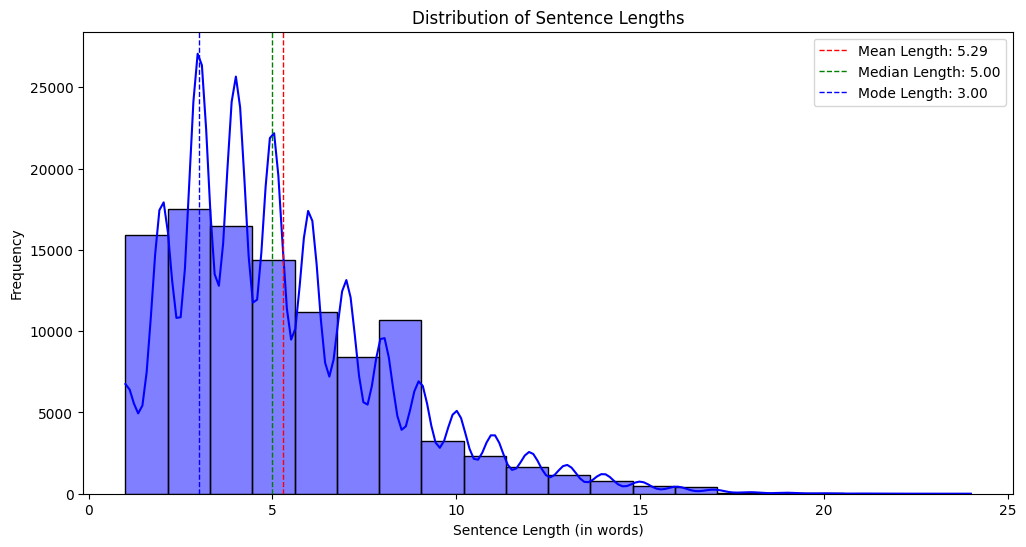

In [90]:
record_lengths = df['name_length']
mean_length = np.mean(record_lengths)
median_length = np.median(record_lengths)
mode_length = np.argmax(np.bincount(record_lengths))

plt.figure(figsize=(12, 6))
sns.histplot(record_lengths, bins=20, kde=True, color='blue')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean Length: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1, label=f'Median Length: {median_length:.2f}')
plt.axvline(mode_length, color='blue', linestyle='dashed', linewidth=1, label=f'Mode Length: {mode_length:.2f}')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [91]:
df.drop(columns=['name_length'], inplace=True)

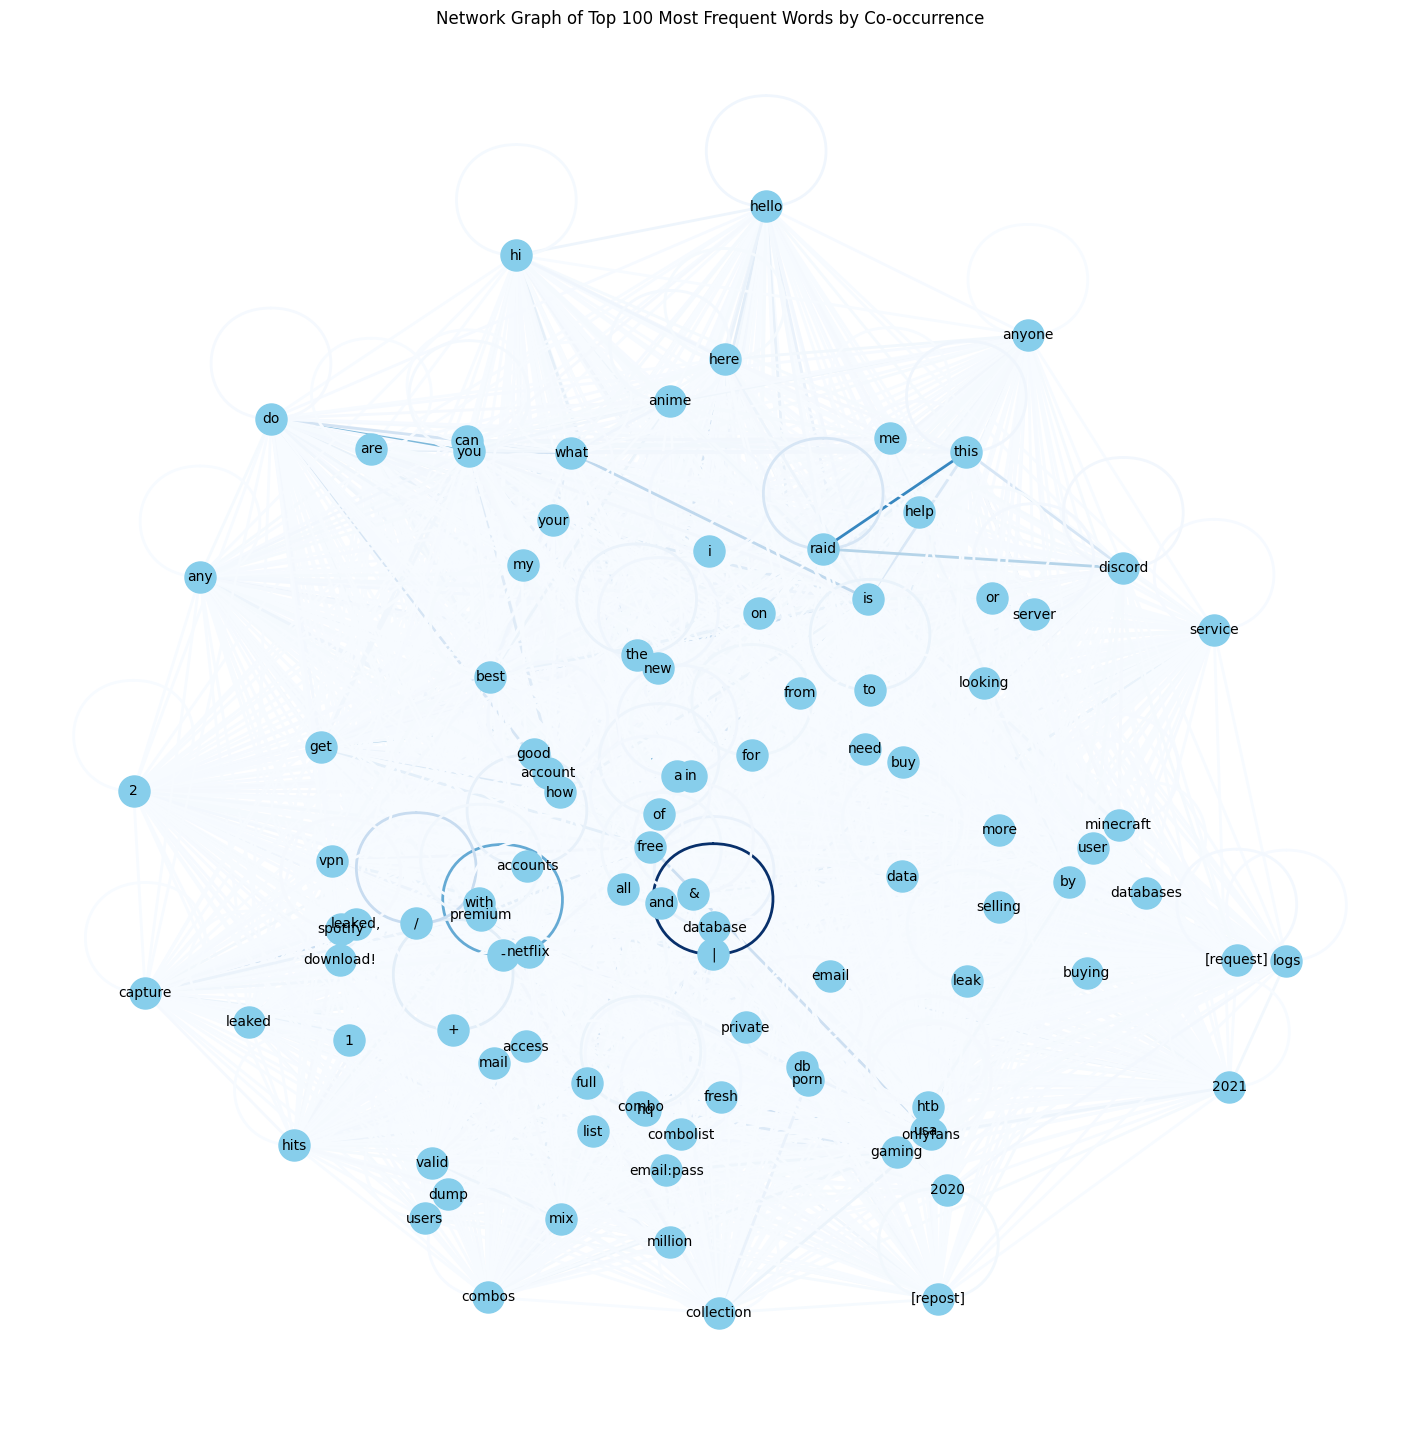

In [92]:
word_dict = Counter(' '.join([str(item).lower() for item in df.name.tolist()]).split())
most_common_words = word_dict.most_common(100)
words, frequencies = zip(*most_common_words)
top_words = set(words)

# Calculate co-occurrences
window_size = 5
co_occurrence = defaultdict(int)

# Tokenize the text
text = ' '.join([str(item).lower() for item in df.name.tolist()])
tokens = text.split()

# Sliding window to count co-occurrences
for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i + window_size]
    for i, word1 in enumerate(window):
        if word1 in top_words:
            for j, word2 in enumerate(window):
                if i != j and word2 in top_words:
                    pair = tuple(sorted([word1, word2]))
                    co_occurrence[pair] += 1

# Create the graph
G = nx.Graph()

# Add edges based on co-occurrence
for (word1, word2), count in co_occurrence.items():
    if count > 1:  # Include only pairs with more than 1 co-occurrence
        G.add_edge(word1, word2, weight=count)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.15, iterations=20)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Network Graph of Top 100 Most Frequent Words by Co-occurrence');

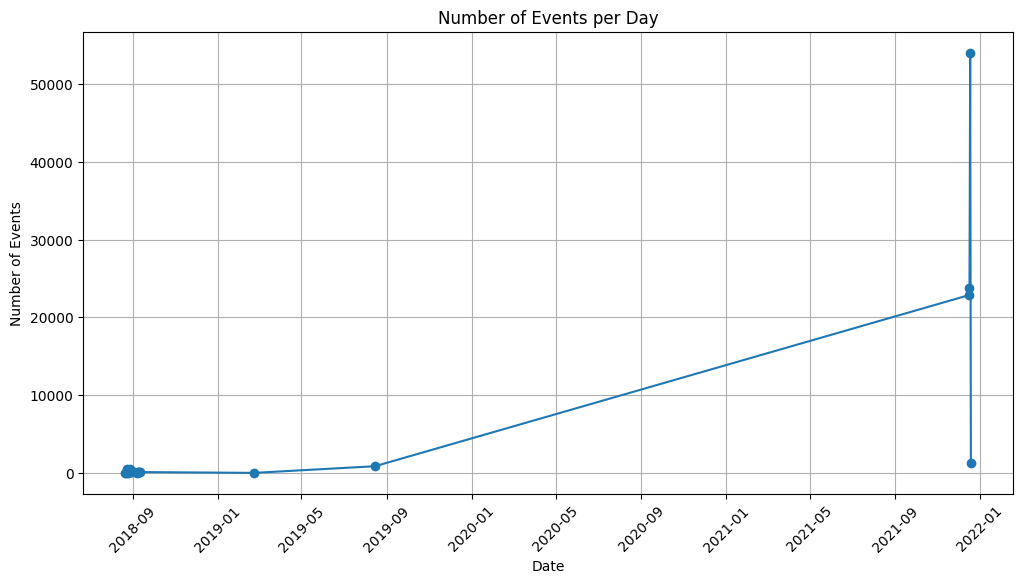

In [93]:
daily_counts = df.groupby(df['created_on_converted'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('Number of Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

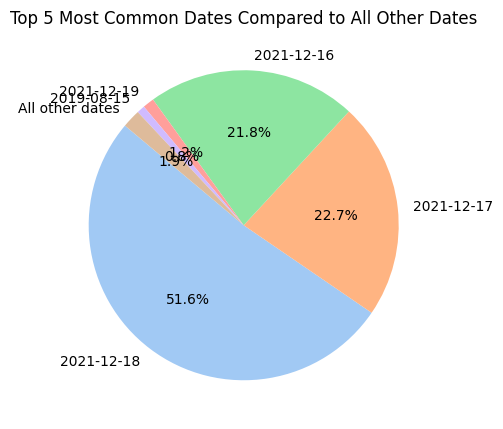

In [94]:
top_5_dates = df['created_on_converted'].value_counts().nlargest(5)
top_5_counts = top_5_dates.values
top_5_labels = top_5_dates.index.date
other_count = len(df) - top_5_counts.sum()

labels = [f'{date}' for date in top_5_labels] + ['All other dates']
sizes = list(top_5_counts) + [other_count]
colors = sns.color_palette('pastel', len(sizes))

plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Common Dates Compared to All Other Dates')
plt.show();

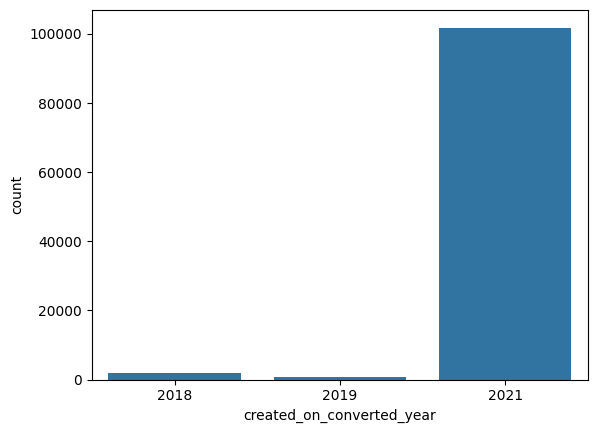

In [96]:
sns.countplot(x='created_on_converted_year', data=df);

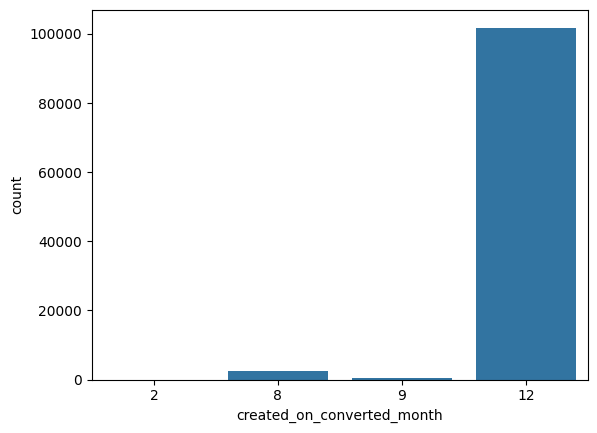

In [97]:
sns.countplot(x='created_on_converted_month', data=df);

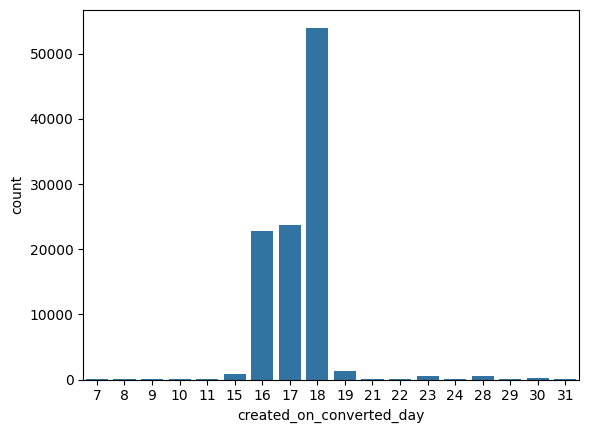

In [98]:
sns.countplot(x='created_on_converted_day', data=df);

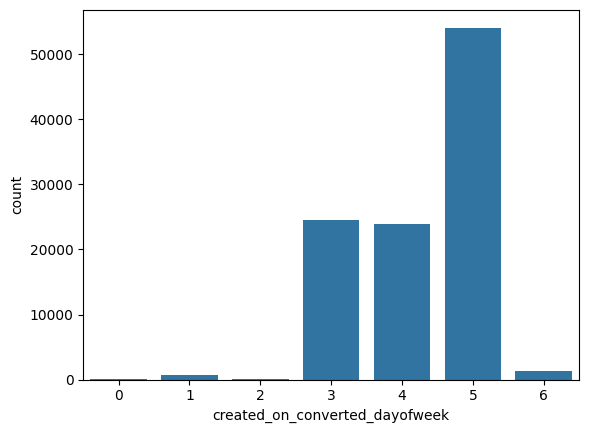

In [100]:
sns.countplot(x='created_on_converted_dayofweek', data=df);

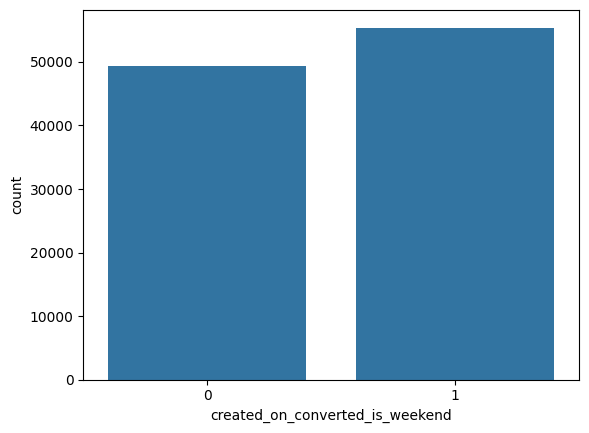

In [101]:
sns.countplot(x='created_on_converted_is_weekend', data=df);

# Pre-process Content

In [102]:
df = ppu.preprocess_url(df, 'name')
df['name'] = df['name'].apply(ppt.remove_html_tags)
df['name'] = df['name'].apply(lambda x: ppt.preprocess_content(x, lowercase=False))

c:\Users\dommy\OneDrive\Documenti\GSoC - Final\GSoC\Analyze_files\SingleDatasetsAnalysis\../../Util\PreProcessingText.py:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [103]:
df.duplicated().sum()

667

In [104]:
df = df.dropna(subset=['name'])
df = df.drop_duplicates(subset=['name'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94408 entries, 0 to 114449
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   label                            21204 non-null  object        
 1   name                             94408 non-null  object        
 2   created_on                       94408 non-null  object        
 3   created_on_converted             94408 non-null  datetime64[ns]
 4   created_on_converted_year        94408 non-null  int32         
 5   created_on_converted_month       94408 non-null  int32         
 6   created_on_converted_day         94408 non-null  int32         
 7   created_on_converted_dayofweek   94408 non-null  int32         
 8   created_on_converted_is_weekend  94408 non-null  int32         
dtypes: datetime64[ns](1), int32(5), object(3)
memory usage: 5.4+ MB


In [105]:
df.head()

,label,name,created_on,created_on_converted,created_on_converted_year,created_on_converted_month,created_on_converted_day,created_on_converted_dayofweek,created_on_converted_is_weekend
0,BUYING,TWITCH DATABASE,2021-12-16 15:56:45,2021-12-16,2021,12,16,3,0
1,SELLING,Databases,2021-12-16 16:18:26,2021-12-16,2021,12,16,3,0
2,SELLING,Vehicle Owners Data,2021-12-16 16:18:41,2021-12-16,2021,12,16,3,0
3,SELLING,DATABASES ALL CHILEANS,2021-12-16 16:17:17,2021-12-16,2021,12,16,3,0
4,BUYING,Bulgarian ABV,2021-12-16 15:56:31,2021-12-16,2021,12,16,3,0


In [106]:
df.to_csv(f"{PATH}CleanedData/threads_raid_cleaned_content_created_preprocessed.csv", index=False)

In [6]:
df = pd.read_csv(f"{PATH}CleanedData/threads_raid_cleaned_content_created_preprocessed.csv")
df['label'].unique()

array(['BUYING', 'SELLING', nan, 'TRADING', 'PAID-STICKY', 'FLAG', 'VPN',
       'GAMING', 'HULU', 'HTTPS', 'TUTORIAL', 'SOCKS5', 'MINECRAFT',
       'STREAMING', 'NETFLIX', 'SPOTIFY', 'SHOPPING', 'PORN',
       'CRUNCHYROLL', 'OPENBULLET', 'SOCKS4', 'SNIPR', 'BLACKBULLET',
       'SENTRY MBA', 'NSFW', 'EMAIL:PASS', 'CSV', 'TXT', 'SQL',
       'PLAINTEXT', 'USER:PASS', 'OTHER'], dtype=object)

# Plot Sentence After Pre-Processing

In [108]:
word_dict = Counter(' '.join([str(item).lower() for item in df.name.tolist()]).split())

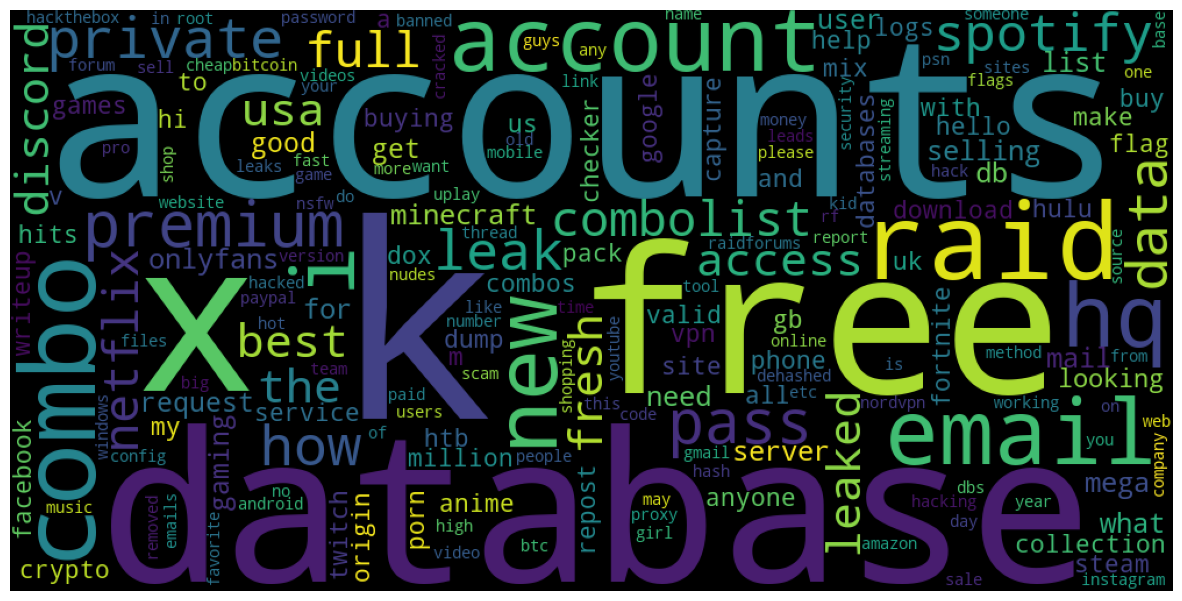

In [109]:
# Count of words in each name_thread
most_common_words = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_dict)
plt.figure(figsize=(15,8))
plt.imshow(most_common_words)
plt.axis("off");

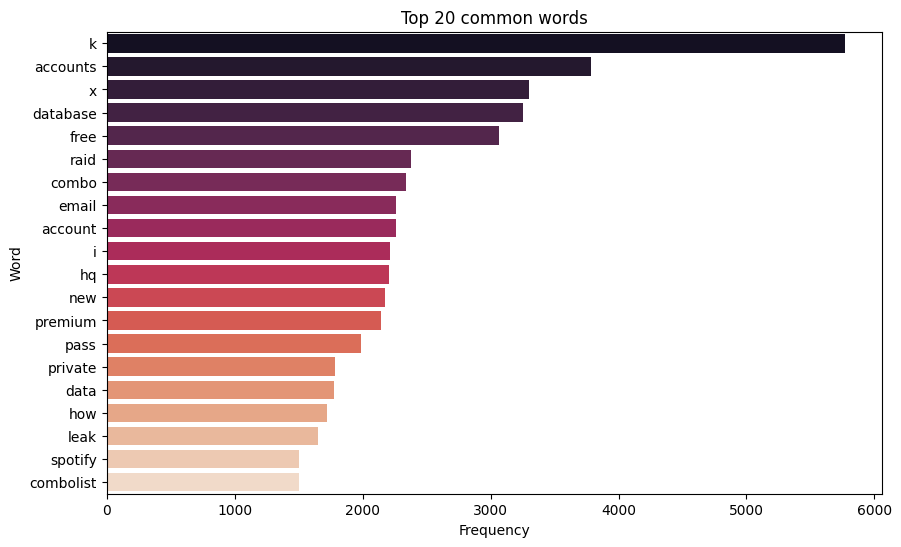

In [110]:
# Most 20 common words
word_freq = word_dict.most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, hue='Word', dodge=False, palette='rocket', legend=False)
plt.title('Top 20 common words');

In [112]:
df['name_length'] = df['name'].apply(lambda x: len(x.split()))
df['name_length'].describe()

count    94408.000000
mean         4.025909
std          2.208910
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         22.000000
Name: name_length, dtype: float64

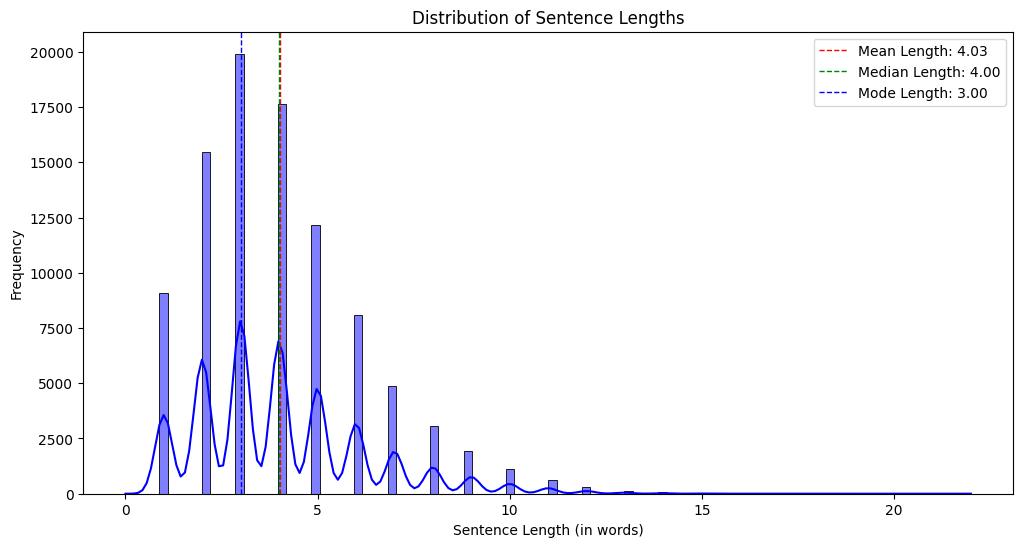

In [113]:
record_lengths = df['name_length']
mean_length = np.mean(record_lengths)
median_length = np.median(record_lengths)
mode_length = np.argmax(np.bincount(record_lengths))

plt.figure(figsize=(12, 6))
sns.histplot(record_lengths, bins=100, kde=True, color='blue')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean Length: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1, label=f'Median Length: {median_length:.2f}')
plt.axvline(mode_length, color='blue', linestyle='dashed', linewidth=1, label=f'Mode Length: {mode_length:.2f}')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

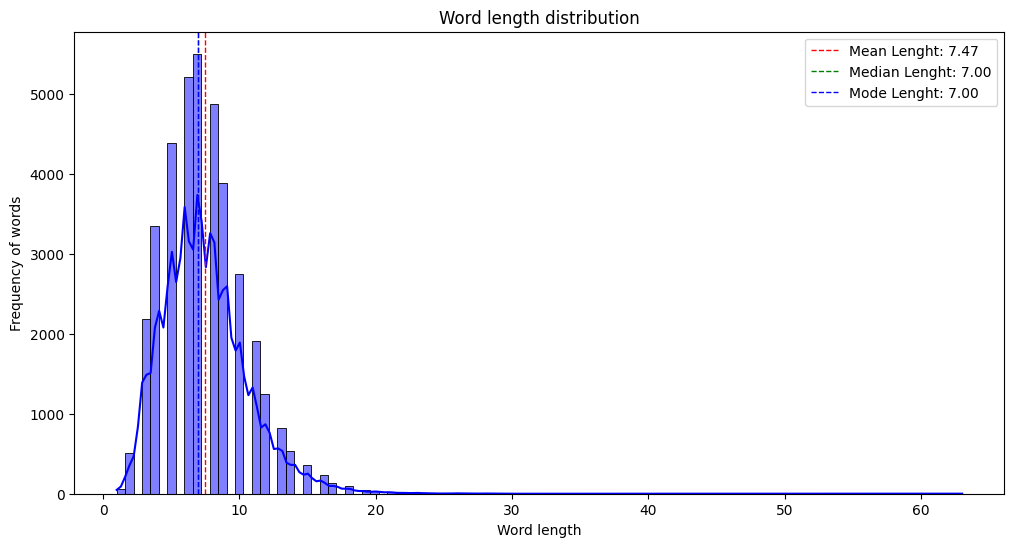

In [114]:
word_lengths = [len(word) for word in word_dict.keys()]
mean_length = np.mean(word_lengths)
median_length = np.median(word_lengths)
mode_length = np.argmax(np.bincount(word_lengths))
plt.figure(figsize=(12, 6))
sns.histplot(word_lengths, bins=100, kde=True, color='blue')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean Lenght: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1, label=f'Median Lenght: {median_length:.2f}')
plt.axvline(mode_length, color='blue', linestyle='dashed', linewidth=1, label=f'Mode Lenght: {mode_length:.2f}')
plt.title('Word length distribution')
plt.xlabel('Word length')
plt.ylabel('Frequency of words')
plt.legend();

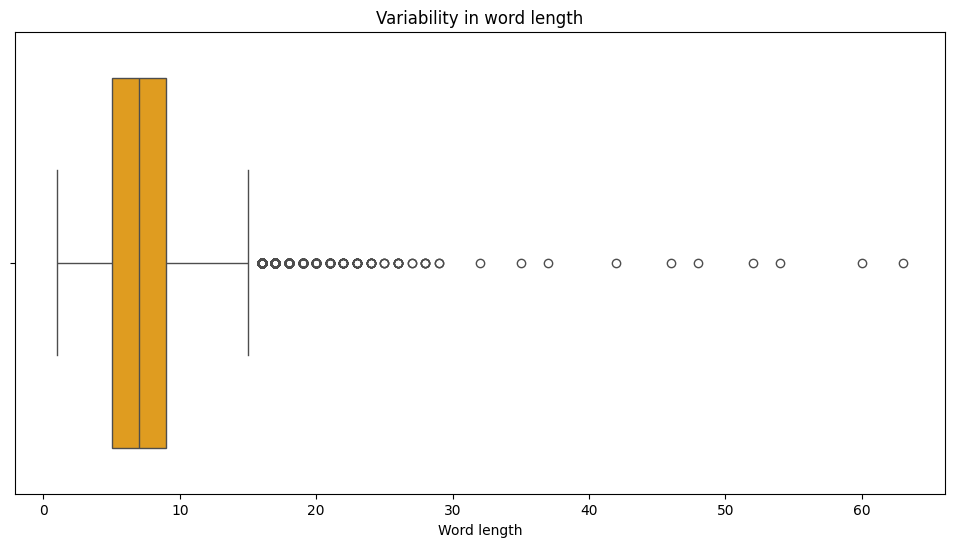

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=word_lengths, color='orange')
plt.title('Variability in word length')
plt.xlabel('Word length');

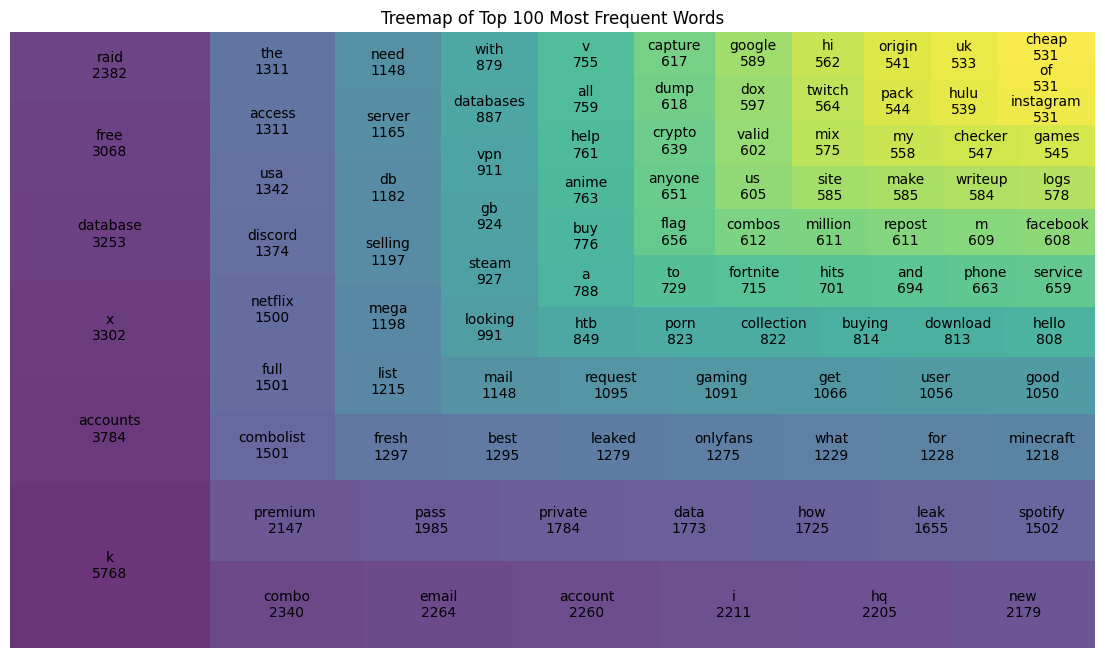

In [116]:
most_common_words = word_dict.most_common(100)
words, frequencies = zip(*most_common_words)
sizes = [freq for freq in frequencies]
labels = [f'{word}\n{freq}' for word, freq in most_common_words]

plt.figure(figsize=(14, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette('viridis', len(sizes)))
plt.axis('off')
plt.title('Treemap of Top 100 Most Frequent Words');

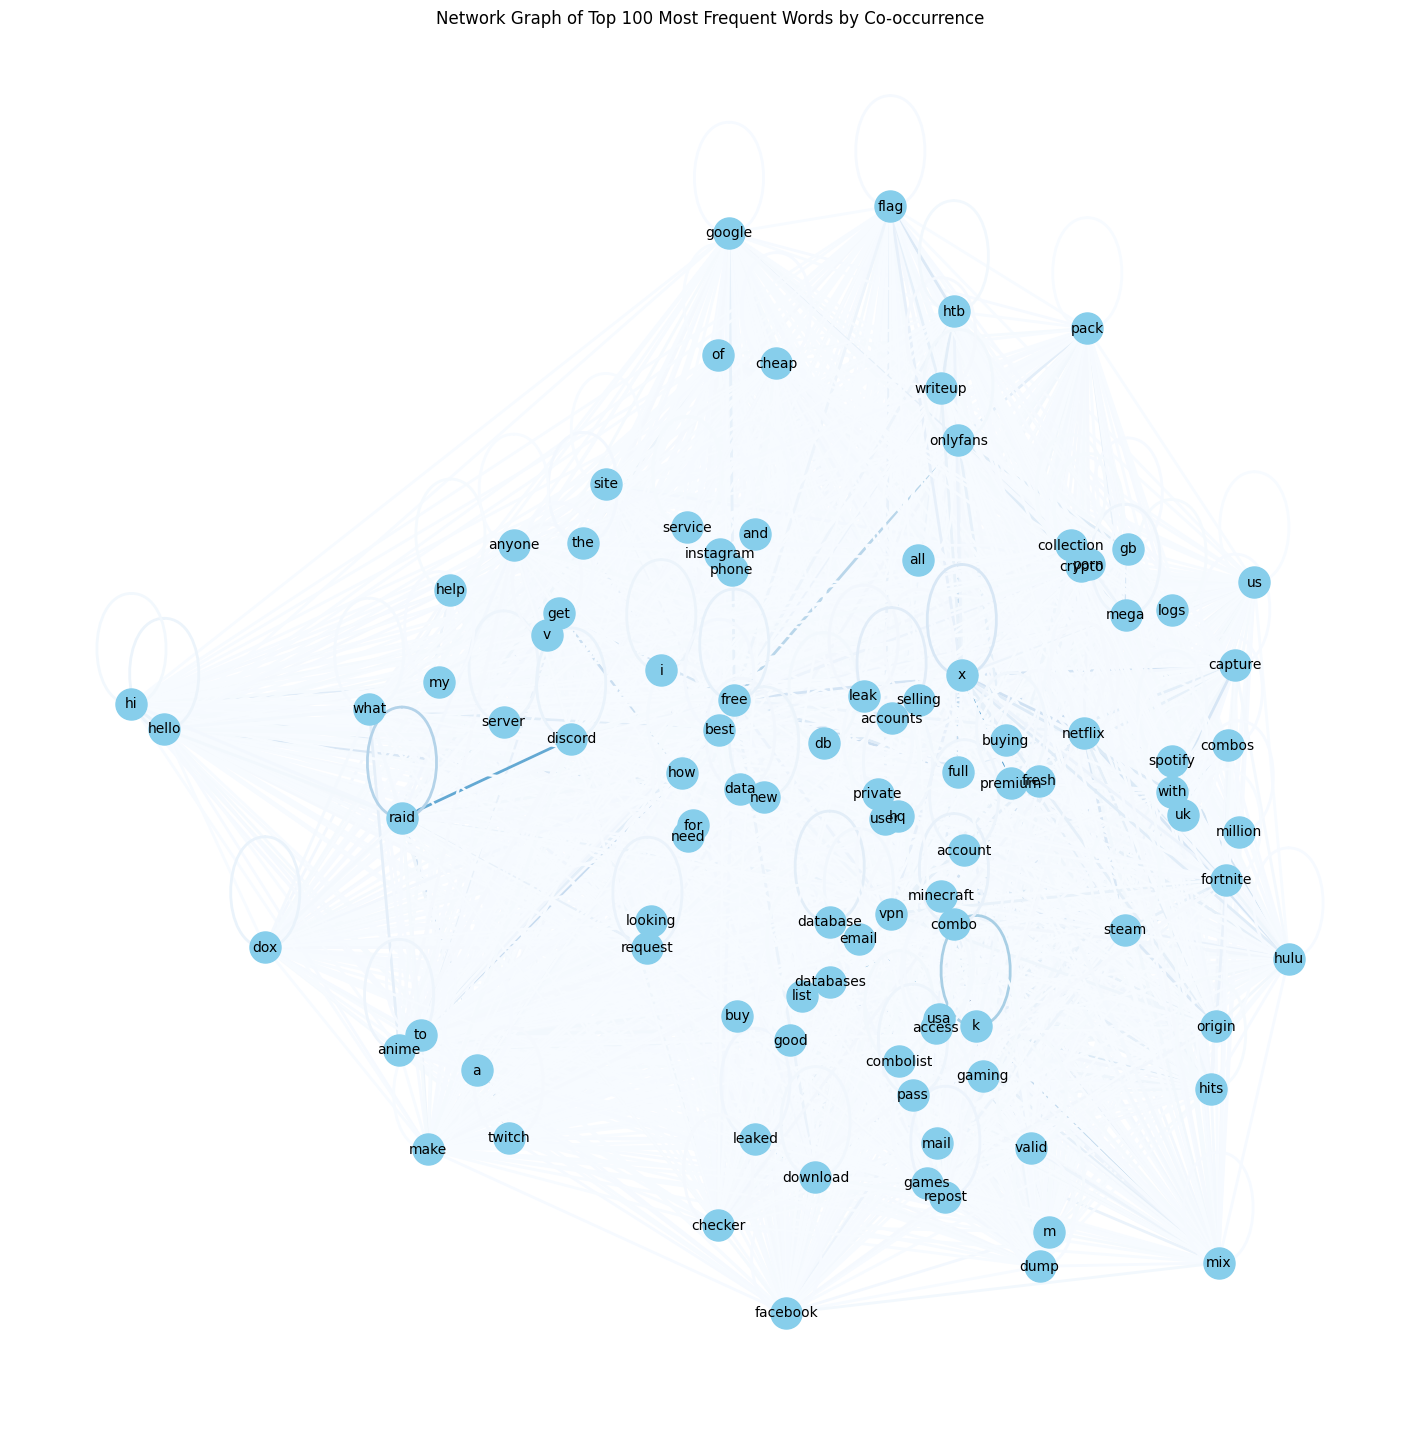

In [118]:
top_words = set(words)

# Calculate co-occurrences
window_size = 5
co_occurrence = defaultdict(int)

# Tokenize the text
text = ' '.join([str(item).lower() for item in df.name.tolist()])
tokens = text.split()

# Sliding window to count co-occurrences
for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i + window_size]
    for i, word1 in enumerate(window):
        if word1 in top_words:
            for j, word2 in enumerate(window):
                if i != j and word2 in top_words:
                    pair = tuple(sorted([word1, word2]))
                    co_occurrence[pair] += 1

# Create the graph
G = nx.Graph()

# Add edges based on co-occurrence
for (word1, word2), count in co_occurrence.items():
    if count > 1:  # Include only pairs with more than 1 co-occurrence
        G.add_edge(word1, word2, weight=count)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.15, iterations=20)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Network Graph of Top 100 Most Frequent Words by Co-occurrence');